<a href="https://colab.research.google.com/github/Lezhenkov/ISII/blob/main/%D0%9B%D0%A0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from tensorflow.keras.datasets import mnist
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPooling2D
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Просмотр и исследование данных 

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
y_train.shape

(60000,)

In [39]:
X_test.shape

(10000, 28, 28)

In [40]:
y_test.shape

(10000,)

In [41]:
sns.set(font_scale=2)
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)

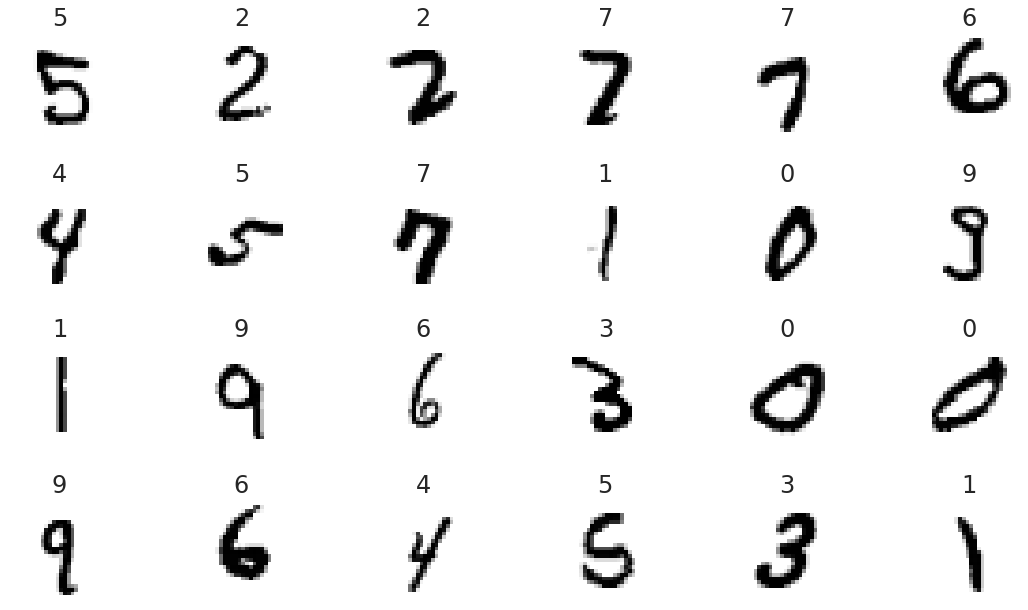

In [42]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
 axes, image, target = item
 axes.imshow(image, cmap=plt.cm.gray_r)
 axes.set_xticks([]) # remove x-axis tick marks
 axes.set_yticks([]) # remove y-axis tick marks
 axes.set_title(target)
 plt.tight_layout()

# Подготовка данных к обучению

In [43]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [44]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

нормализация данных

In [45]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

преобразование меток 
из целых чисел в категорийные данные

In [46]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [47]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [48]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

# Создаем нейросеть

In [61]:
cnn = Sequential()

In [62]:
# добавление в модель сверточного уровня Conv2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))
# добавление уровня MaxPooling2D
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# доабвляем еще один свертывающий  и объединяющий уровень для ум. степени размерности
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [63]:
# преобразовываем вход от трехмерного к одномерному
cnn.add(Flatten())

In [56]:
# уровень для сокращения признаков
cnn.add(Dense(units=128, activation='relu'))

In [65]:
# выходной уровень для классификации признаков
cnn.add(Dense(units=10, activation='softmax'))

Вывод уровней модели

In [66]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 10)               

Визуализация

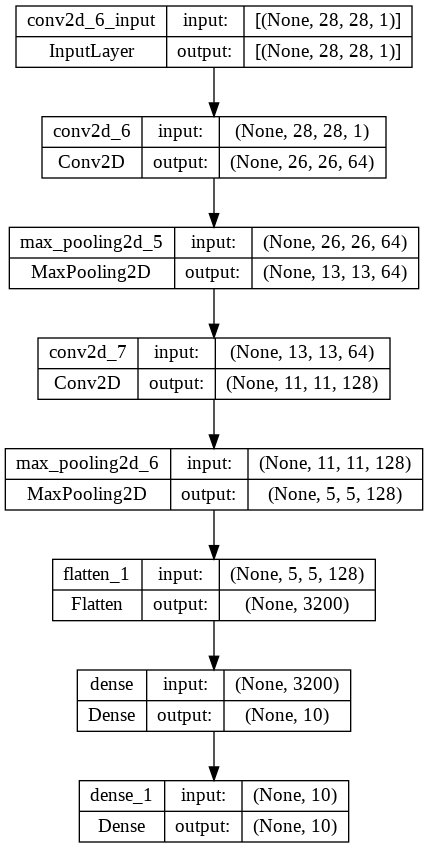

In [69]:
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
show_layer_names=True)
Image(filename='convnet.png')

# Компиляция

In [70]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели и оценка

In [71]:
cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 127s 75ms/step - loss: 1.3462 - accuracy: 0.5691 - val_loss: 0.9039 - val_accuracy: 0.5908
Epoch 2/10
1688/1688 [==============================] - 128s 76ms/step - loss: 0.7761 - accuracy: 0.6014 - val_loss: 0.6952 - val_accuracy: 0.5915
Epoch 3/10
1688/1688 [==============================] - 127s 75ms/step - loss: 0.6604 - accuracy: 0.6083 - val_loss: 0.6414 - val_accuracy: 0.6047
Epoch 4/10
1688/1688 [==============================] - 128s 76ms/step - loss: 0.6179 - accuracy: 0.6157 - val_loss: 0.6196 - val_accuracy: 0.6288
Epoch 5/10
1688/1688 [==============================] - 127s 75ms/step - loss: 0.5949 - accuracy: 0.6274 - val_loss: 0.6047 - val_accuracy: 0.6208
Epoch 6/10
1688/1688 [==============================] - 128s 76ms/step - loss: 0.5628 - accuracy: 0.7334 - val_loss: 0.5091 - val_accuracy: 0.8535
Epoch 7/10
1688/1688 [==============================] - 125s 74ms/step - loss: 0.3942 - accuracy: 0.9318 - val_loss: 0

оценка модели

In [72]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.1276 - accuracy: 0.9809


In [75]:
predictions = cnn.predict(X_test)
y_test[2] # данный образец показывает цифру 1

313/313 [==============================] - 6s 20ms/step


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [76]:
for index, probability in enumerate(predictions[2]):
 print(f'{index}: {probability:.10%}') # данный образец предоставляет цифру 1 с вероятностью 99.62%

0: 0.0043329026%
1: 99.6227920055%
2: 0.0738129893%
3: 0.0046334022%
4: 0.1148011186%
5: 0.0223829556%
6: 0.0131840119%
7: 0.0849803095%
8: 0.0503330608%
9: 0.0087405504%


поиск неверных прогнозов

In [79]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)
  if predicted != expected:
    incorrect_predictions.append((i, images[i], predicted, expected))
len(incorrect_predictions)

191

визуализация ошибок

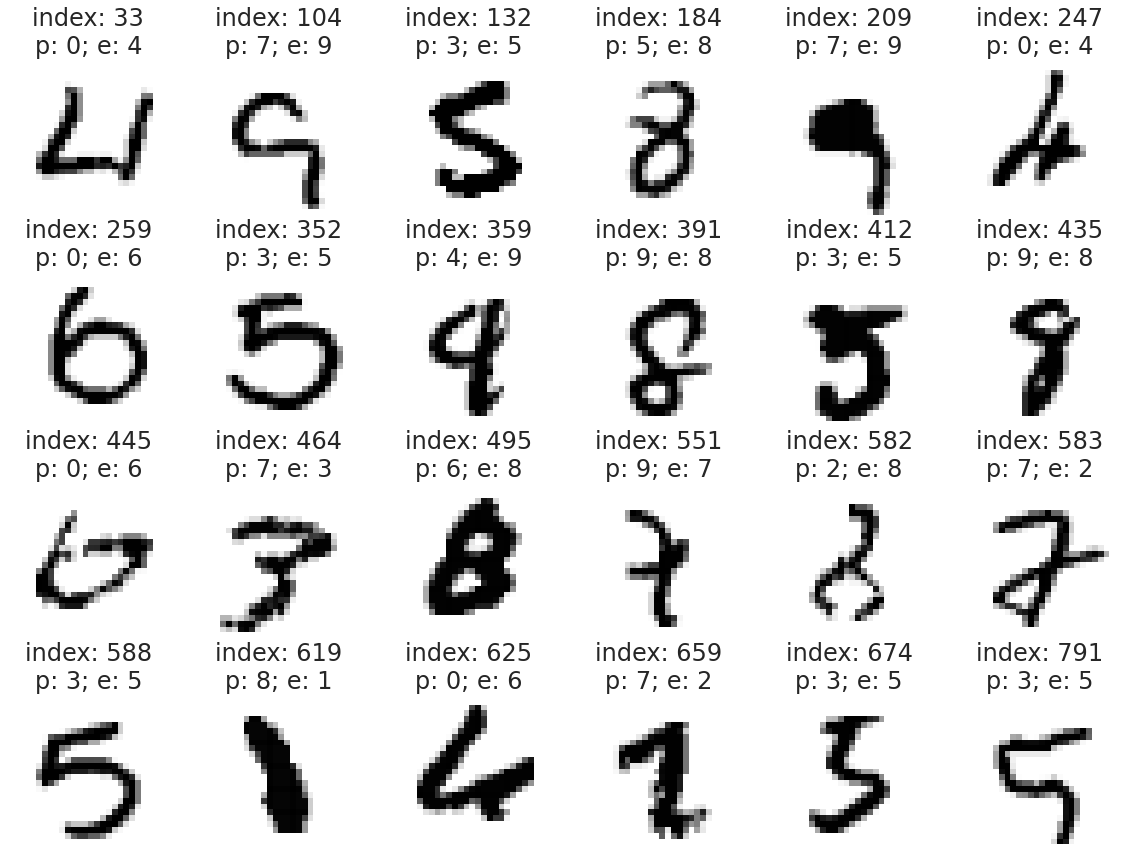

In [81]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
   index, image, predicted, expected = item
   axes.imshow(image, cmap=plt.cm.gray_r)
   axes.set_xticks([]) # remove x-axis tick marks
   axes.set_yticks([]) # remove y-axis tick marks
   axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [85]:
def display_probabilities(prediction):
 for index, probability in enumerate(prediction):
   print(f'{index}: {probability:.10%}')

In [86]:
display_probabilities(predictions[619]) 

0: 0.5033244845%
1: 10.7356309891%
2: 1.3224971481%
3: 0.2594187856%
4: 5.8081902564%
5: 5.6260559708%
6: 3.9635188878%
7: 4.8168946058%
8: 61.5478634834%
9: 5.4165914655%


система считает что это число 8 с вероятностью 68%, но также присутствуют и другие варианты. Например: 10% - 1, 5% - 4 или 5

In [87]:
display_probabilities(predictions[247]) 

0: 50.7742941380%
1: 0.5435366649%
2: 3.6039121449%
3: 0.0503495045%
4: 7.4269823730%
5: 1.0862372816%
6: 26.8593490124%
7: 0.8416806348%
8: 8.1727072597%
9: 0.6409449503%


## сохраняем и загружаем модель

In [89]:
cnn.save('mnist_cnn.h5')
cnn = load_model('mnist_cnn.h5')